<font size= 10>K-Means algorethm</font>

**sample implementation**

In [ ]:
import math

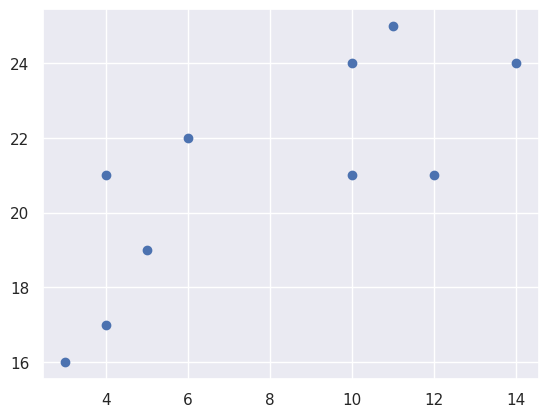

In [ ]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
plt.scatter(x, y)
plt.show()

Step 1 : select 2 random point and cluster data

In [ ]:
C1 = [x[2],y[2]]
C2 = [x[5],y[5]]

cluster1 = []
cluster2 = []

for i in range(len(x)):
  # Distance from C1
  dc1 = math.sqrt( (x[i]-C1[0])**2 + (y[i]-C1[1])**2)
  # Distance from C2
  dc2 = math.sqrt( (x[i]-C2[0])**2 + (y[i]-C2[1])**2)

  # Assign to cluster
  if(dc1<dc2):
    cluster1.append([x[i],y[i]])
  else:
    cluster2.append([x[i],y[i]])

print('Cluster 1:',cluster1)

print('Cluster 2:',cluster2)

Cluster 1: [[4, 21], [5, 19], [10, 24], [4, 17], [3, 16], [6, 22], [10, 21], [12, 21]]
Cluster 2: [[11, 25], [14, 24]]


Step 2: update C1 and C2 using mean of clusters

In [ ]:
def cluster_mean(cluster:list):

  meanx = 0
  meany = 0

  for i in range(len(cluster)):
    meanx += cluster[i][0]
    meany += cluster[i][1]

  return [meanx/len(cluster), meany/len(cluster)]


In [ ]:

C1 = cluster_mean(cluster1)
C2 = cluster_mean(cluster2)
print('center of cluster 1:',C1)
print('center of cluster 2:',C2)

cluster1 = []
cluster2 = []
for i in range(len(x)):
  # Distance from C1
  dc1 = math.sqrt( (x[i]-C1[0])**2 + (y[i]-C1[1])**2)
  # Distance from C2
  dc2 = math.sqrt( (x[i]-C2[0])**2 + (y[i]-C2[1])**2)
  # Assign to cluster
  if(dc1<dc2):
    cluster1.append([x[i],y[i]])
  else:
    cluster2.append([x[i],y[i]])

print('Cluster 1:',cluster1)

print('Cluster 2:',cluster2)

center of cluster 1: [6.75, 20.125]
center of cluster 2: [12.5, 24.5]
Cluster 1: [[4, 21], [5, 19], [4, 17], [3, 16], [6, 22], [10, 21]]
Cluster 2: [[10, 24], [11, 25], [14, 24], [12, 21]]


In [ ]:
C1 = cluster_mean(cluster1)
C2 = cluster_mean(cluster2)
print('center of cluster 1:',C1)
print('center of cluster 2:',C2)
cluster1 = []
cluster2 = []
for i in range(len(x)):
  # Distance from C1
  dc1 = math.sqrt( (x[i]-C1[0])**2 + (y[i]-C1[1])**2)
  # Distance from C2
  dc2 = math.sqrt( (x[i]-C2[0])**2 + (y[i]-C2[1])**2)

  # Assign to cluster
  if(dc1<dc2):
    cluster1.append([x[i],y[i]])
  else:
    cluster2.append([x[i],y[i]])

print('Cluster 1:',cluster1)

print('Cluster 2:',cluster2)

print('C1',cluster_mean(cluster1))
print('C2',cluster_mean(cluster2))

center of cluster 1: [5.333333333333333, 19.333333333333332]
center of cluster 2: [11.75, 23.5]
Cluster 1: [[4, 21], [5, 19], [4, 17], [3, 16], [6, 22]]
Cluster 2: [[10, 24], [11, 25], [14, 24], [10, 21], [12, 21]]
C1 [4.4, 19.0]
C2 [11.4, 23.0]


No change in clusters and algorithm ends

sklearn implementation and testing dementia dataset from kaggle

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

dementias = pd.read_csv("/content/drive/MyDrive/DATA/dementia_dataset.csv")

print("Size of the dataset before dropping the records with missed values:",dementias.shape[0],"rows &",dementias.shape[1],"columns" )

# Since machine learning algorithms cannot work with missing data, we have to drop these records.
# Dropping the records with missing value
dementias = dementias.dropna()
print("Size of the dataset after  dropping the records with missed values:",dementias.shape[0],"rows &",dementias.shape[1],"columns" )
# The dataset has tow categorical columns
# Mapping categorical columns to 0 and 1
dementias['M/F'] = dementias['M/F'].map({'M': 0, 'F': 1})
dementias['Hand'] = dementias['Hand'].map({'R': 0, 'L': 1})
dementias['Group'] = dementias['Group'].map({'Demented':1,'Nondemented':0,'Converted':0})
# Splitting our data
# By default, Sklearn will reserve 25% of the dataset for training.
# we do not need to  'Subject ID' & 'MRI ID' columns
X_train = dementias[['Visit','MR Delay','M/F','Hand','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']]

# Target
y_train = dementias['Group']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

Size of the dataset before dropping the records with missed values: 373 rows & 15 columns
Size of the dataset after  dropping the records with missed values: 354 rows & 15 columns



In order to find the best value for K, we need to run K-means across our data for a range of possible values. We only have 10 data points, so the maximum number of clusters is 10. So for each value K in range(1,11), we train a K-means model and plot the intertia at that number of clusters

We can see that the "elbow" on the graph above (where the interia becomes more linear) is at K=2. We can then fit our K-means algorithm one more time and plot the different clusters assigned to the data:

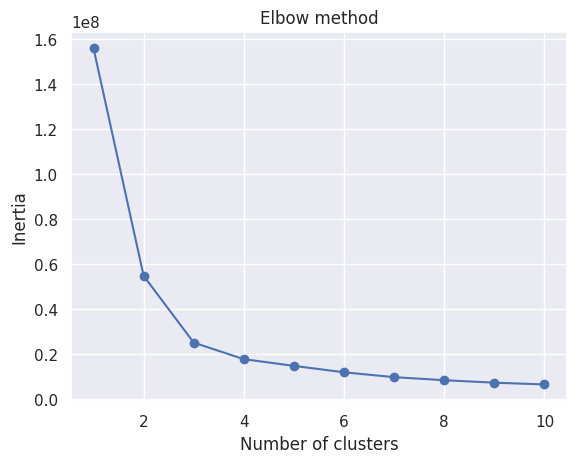

In [ ]:
#Turn the data into a set of points:
data = X_train.values

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

First try prediction

In [ ]:

X = X_train.values
Y = np.array(y_train)
kmeans = KMeans(n_clusters=2,n_init=10) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

correct = 0
for i in range(len(X)):
    #predict_me = np.array(X[i].astype(float))
    #predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(X)
    if prediction[0] == Y[i]: correct += 1

print(correct/len(X))

0.3587570621468927


Try using adjusted parameters

In [ ]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'lloyd',n_init=10)
kmeans.fit(X)
correct = 0
for i in range(len(X)):
    prediction = kmeans.predict(X)
    if prediction[0] == Y[i]: correct += 1

print(correct/len(X))

0.6412429378531074
